In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv 
import dateutil

In [29]:
dfWeather= pd.read_csv('Data/FinalWeather2016Hourly.csv')

dfWeather = dfWeather.rename(columns = {'date': 'DateString'})
dfWeather = dfWeather.rename(columns = {'HourOfDay': 'HourofDay'})
dfWeather.head()

,Unnamed: 0,Unnamed: 0.1,DateString,TimeEST,Conditions,DateTime,HourofDay
0,0,0,2016-01-01,12:51 AM,Favorable,2016-01-01 00:51:00,0
1,1,1,2016-01-01,1:51 AM,Favorable,2016-01-01 01:51:00,1
2,2,2,2016-01-01,2:51 AM,Favorable,2016-01-01 02:51:00,2
3,3,3,2016-01-01,3:51 AM,Favorable,2016-01-01 03:51:00,3
4,4,4,2016-01-01,4:51 AM,Favorable,2016-01-01 04:51:00,4


In [12]:
dfTaxiJan = pd.read_csv('Data/jan.csv')
dfTaxiFeb = pd.read_csv('Data/feb.csv')
dfTaxiMarch = pd.read_csv('Data/march.csv')
dfTaxiApril = pd.read_csv('Data/april.csv')
dfTaxiMay = pd.read_csv('Data/may.csv')
dfTaxiJun = pd.read_csv('Data/jun.csv')

In [14]:
import datetime
dfTaxiJan['Date'] = pd.to_datetime(dfTaxiJan.Date)
dfTaxiFeb['Date'] = pd.to_datetime(dfTaxiFeb.Date)
dfTaxiMarch['Date'] = pd.to_datetime(dfTaxiMarch.Date)
dfTaxiApril['Date'] = pd.to_datetime(dfTaxiApril.Date)
dfTaxiMay['Date'] = pd.to_datetime(dfTaxiMay.Date)
dfTaxiJun['Date'] = pd.to_datetime(dfTaxiJun.Date)

In [16]:
frame = [dfTaxiJan, dfTaxiFeb, dfTaxiMarch, dfTaxiApril, dfTaxiMay, dfTaxiJun]
result = pd.concat(frame)

In [17]:
result.shape

(4368, 3)

In [18]:
result.head()

,Date,HourofDay,count
0,2016-01-27,1,5073
1,2016-01-29,17,21195
2,2016-01-06,12,16901
3,2016-01-02,2,6644
4,2016-01-17,10,15803


In [24]:
result['DateString'] = result['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [25]:
result.head()

,Date,HourofDay,count,DateString
0,2016-01-27,1,5073,2016-01-27
1,2016-01-29,17,21195,2016-01-29
2,2016-01-06,12,16901,2016-01-06
3,2016-01-02,2,6644,2016-01-02
4,2016-01-17,10,15803,2016-01-17


In [27]:
dfAggValues = result.merge(dfWeather, on='DateString', how='left')

In [28]:
dfAggValues.head()

,Date,HourofDay,count,DateString,Unnamed: 0,Unnamed: 0.1,TimeEST,Conditions,DateTime,HourOfDay
0,2016-01-27,1,5073,2016-01-27,708,708,7:51 PM,Favorable,2016-01-27 19:51:00,19
1,2016-01-27,1,5073,2016-01-27,709,709,8:51 PM,Favorable,2016-01-27 20:51:00,20
2,2016-01-27,1,5073,2016-01-27,710,710,9:51 PM,Favorable,2016-01-27 21:51:00,21
3,2016-01-27,1,5073,2016-01-27,711,711,10:51 PM,Favorable,2016-01-27 22:51:00,22
4,2016-01-27,1,5073,2016-01-27,712,712,11:51 PM,Favorable,2016-01-27 23:51:00,23


In [30]:
dfAggValues2 = result.merge(dfWeather, on=['DateString', 'HourofDay'], how='left')

In [31]:
dfAggValues2.head()

,Date,HourofDay,count,DateString,Unnamed: 0,Unnamed: 0.1,TimeEST,Conditions,DateTime
0,2016-01-27,1,5073,2016-01-27,714.0,714.0,1:51 AM,Favorable,2016-01-27 01:51:00
1,2016-01-29,17,21195,2016-01-29,778.0,778.0,5:51 PM,Favorable,2016-01-29 17:51:00
2,2016-01-06,12,16901,2016-01-06,128.0,128.0,12:51 PM,Favorable,2016-01-06 12:51:00
3,2016-01-02,2,6644,2016-01-02,26.0,26.0,2:51 AM,Favorable,2016-01-02 02:51:00
4,2016-01-17,10,15803,2016-01-17,446.0,446.0,10:51 AM,Favorable,2016-01-17 10:51:00


In [33]:
dfAvgValuesMultiGroup = pd.DataFrame(dfAggValues2.groupby(['HourofDay', 'Conditions'], as_index=False)['count'].mean())

In [44]:
dfTotal = dfAvgValuesMultiGroup.reset_index()
dfTotal = dfTotal.pivot_table('count', ['HourofDay'], 'Conditions')
dfTotal

Conditions,Favorable,Unfavorable
HourofDay,,
0,13926.483146,10991.388889
1,9909.133690,8683.000000
2,7185.602151,7602.437500
3,5418.758065,4891.040000
4,4037.207650,4001.500000
5,3946.234043,3812.264706
6,8673.712821,8667.171429
7,14588.587940,15589.823529
8,17428.825641,17994.210526


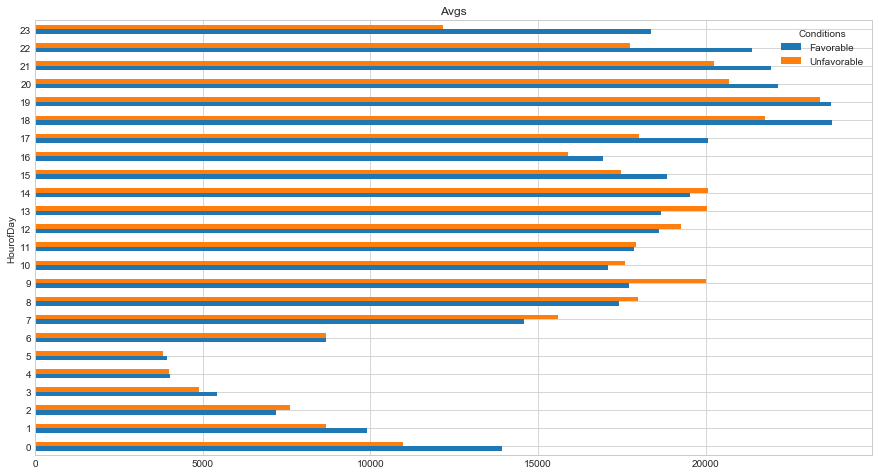

In [45]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (15, 8)
dfTotal.plot(kind='barh', title='Avgs')

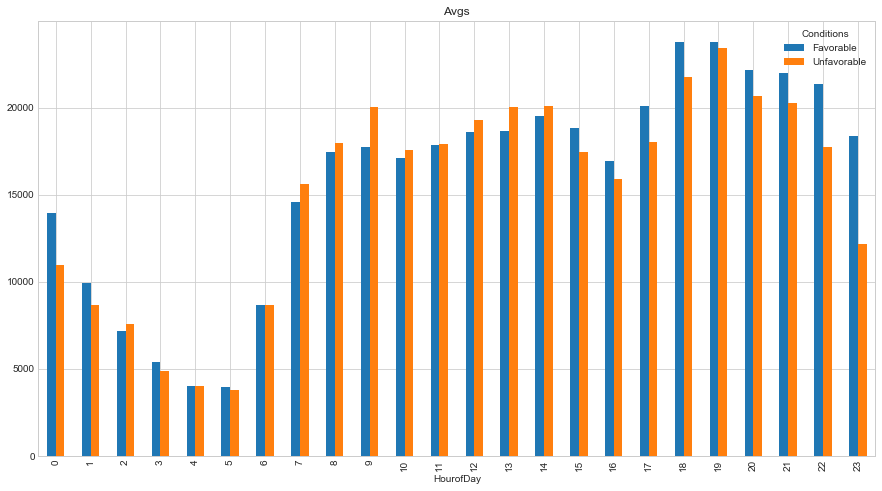

In [46]:
dfTotal.plot(kind='bar', title='Avgs')

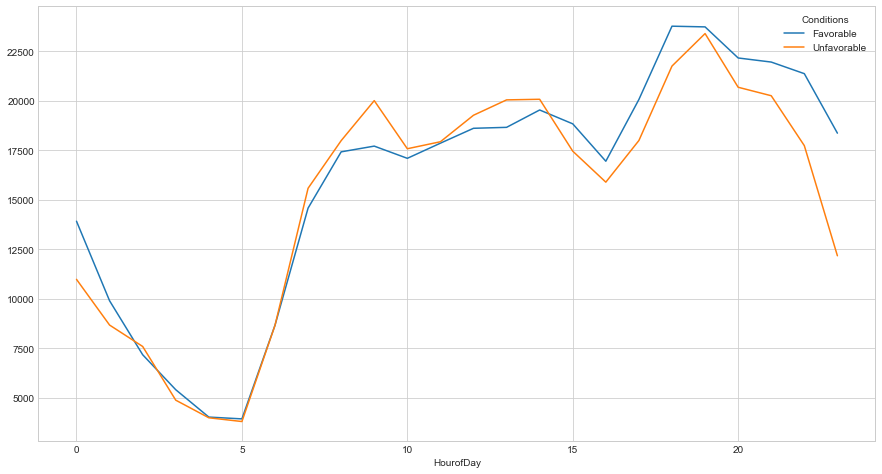

In [47]:
dfTotal.plot()